# Cogmaster – Methods in Computational Neuroscience

Antoine Marion


## PROBLEM 1 Rescorla-Wagner Model

Several classical conditioning experiments can be qualitatively reproduced by the Rescorla-Wagner model (see Chapter 9.1-9.2 of the Dayan & Abbott). To explain these experimental observations, we assume that the objective of an animal is to predict the presence of certain events such as a food reward.

The all set of following developpement leans on the Rescorla-Wagner model.


### Generation of a set of stimuli and rewards

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We simulate the following set of rewards and stimuli:
R= [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
U= [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]


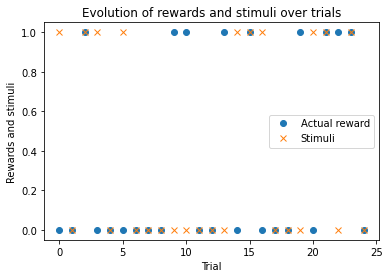

In [2]:
N=25
R=[]
U=[]
for i in range (0,N):
    R.append(np.random.randint(0,2))
    U.append(np.random.randint(0,2))
    
print('We simulate the following set of rewards and stimuli:')
print('R=',R)
print('U=',U)

plt.figure()
plt.plot(R,'o',label='Actual reward')
plt.plot(U,'x',label='Stimuli')
plt.xlabel('Trial')
plt.ylabel('Rewards and stimuli')
plt.title('Evolution of rewards and stimuli over trials')
plt.legend()
plt.show()

### Simulation of the estimated reward $V$

According to the previosu model we plot the evolution of rewards estimation over the trials.

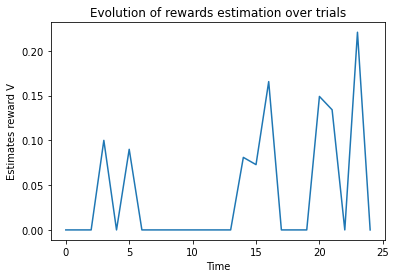

In [3]:
w_o=0
w=w_o
V=[]
epsilon=0.1

for i in range (0,N):
    V.append(w*U[i])
    delta=R[i]-U[i]*w
    w+=epsilon*delta*U[i]

plt.figure()
plt.plot(V,label='Estimated reward')
plt.xlabel('Time')
plt.ylabel('Estimates reward V')
plt.title('Evolution of rewards estimation over trials')
plt.show()

### Study of the influence of the learning parameter $\epsilon$

The following plot details the influence of the $\epsilon$ parameter of the rewards estimation

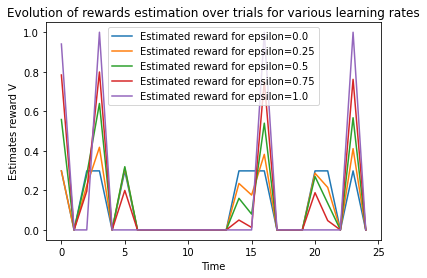

In [4]:
Epsilon=np.linspace(0,1,5)

plt.figure()
for epsilon in Epsilon:
    V=[]
    for i in range (0,N):
        V.append(w*U[i])
        delta=R[i]-U[i]*w
        w+=epsilon*delta*U[i]

    plt.plot(V,label='Estimated reward for epsilon='+str(epsilon))
    plt.xlabel('Time')
    plt.ylabel('Estimates reward V')
    plt.title('Evolution of rewards estimation over trials for various learning rates')
    plt.legend()
plt.show()

We can observe that for larger values of $\epsilon$, the estimates reward will quickly approach the actual reward value. Therefore, if more precise, high $\epsilon$ values introduce strong discontinuties in the reward evaluation $V$.

### Partial conditionning

By now, the stimus is constantly present. Hence we have

In [5]:
U=[1]*N
print('U=',U)

U= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Also, we have the following plot considering the presence of a reward with a probability of 0.4 :

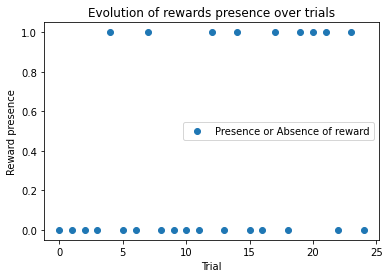

In [6]:
PA=[]
for i in range(0,N):
    tirage=np.random.rand()
    if tirage>0.4:
        PA.append(0)
    elif tirage<=0.4:
        PA.append(1)

plt.figure()
plt.plot(PA,'o',label='Presence or Absence of reward')
plt.xlabel('Trial')
plt.ylabel('Reward presence')
plt.title('Evolution of rewards presence over trials')
plt.legend()
plt.show()

Comes out of this simulation of the presence of the reward the following estimation of the reward over the trials :

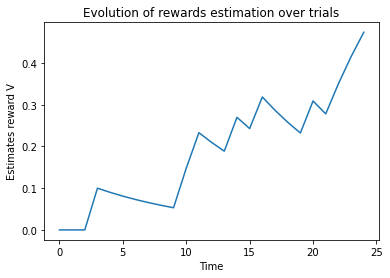

In [7]:
w_o=0
w=w_o
V=[]
epsilon=0.1

for i in range (0,N):
    V.append(w*U[i])
    delta=R[i]-U[i]*w
    w+=epsilon*delta*U[i]

plt.figure()
plt.plot(V,label='Estimated reward')
plt.xlabel('Time')
plt.ylabel('Estimates reward V')
plt.title('Evolution of rewards estimation over trials')
plt.show()

We can observe the estimation of the reward increasing over trials. This is consistent with the constant stimulation $U_i=1$ for each $i$. However due to the presence of a reward conditionned by a probability of $0.4$, $V$ will not converge towards any value.


### Blocking

We now consider two different stimulus in order to introduce the phenomenon of blocking. 
Can be observed the situation of stimuli and rewards presence on the following plot.

According to this, we can plot the evolution of the reward estimation based on these two stimuli.

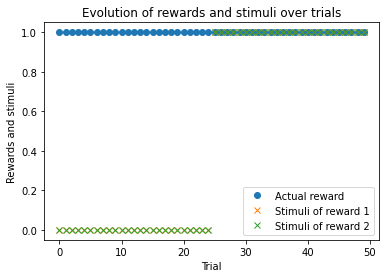

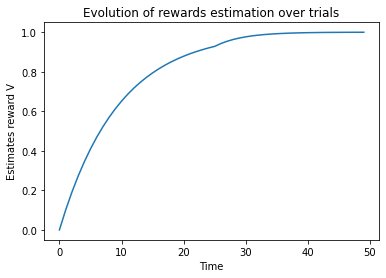

In [8]:
R=[1]*(2*N)
U1=[]
U2=[]


for i in range (0,N):
    U1.append(1)
    U2.append(0)

for i in range (N,2*N):
    U1.append(1)
    U2.append(1)

plt.figure()
plt.plot(R,'o',label='Actual reward')
plt.plot(U2,'x',label='Stimuli of reward 1')
plt.plot(U2,'x',label='Stimuli of reward 2')
plt.xlabel('Trial')
plt.ylabel('Rewards and stimuli')
plt.title('Evolution of rewards and stimuli over trials')
plt.legend()
plt.show()



w_o1=0
w_o2=0
w1=w_o1
w2=w_o2
V=[]
epsilon=0.1

for i in range (0,2*N):
    V.append(w1*U1[i]+w2*U2[i])
    delta=R[i]-V[i]
    w1+=epsilon*delta*U1[i]
    w2+=epsilon*delta*U2[i]

plt.figure()
plt.plot(V,label='Estimated reward')
plt.xlabel('Time')
plt.ylabel('Estimates reward V')
plt.title('Evolution of rewards estimation over trials')
plt.show()

We have assumed that there are two stimuli, $U_1$ and $U_2$, and two parameters, $w_1$ and $w_2$ to learn,
and that the animal’s prediction is given by $v = w_1 U_1 + w_2 U_2$. During the first 25 trials, only one stimulus and the reward are present, during the next 25 trials, both stimuli and the reward are present.
After simulating this situation we observe what could have been intuitively inefered : the estimated reward increase more sharply as soon as the animal is in the known of the two stimuli (nevertheless, this is not blattant on the following plot as the estimated reward is already close to its limit which equals $1$).

### Overshadowing 

Similarly to the blocking situation, we now observe the fact when again that there are two stimuli and two parameters to learn. However, now both stimuli are present from the beginning, as is the reward.

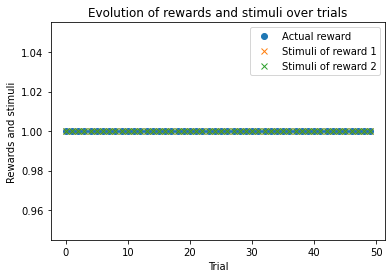

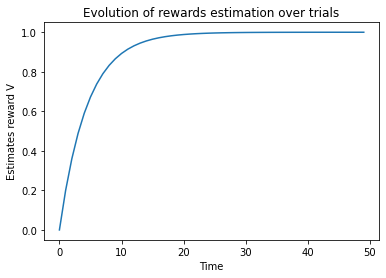

In [9]:
R=[1]*(2*N)
U1=[]
U2=[]


for i in range (0,2*N):
    U1.append(1)
    U2.append(1)

plt.figure()
plt.plot(R,'o',label='Actual reward')
plt.plot(U2,'x',label='Stimuli of reward 1')
plt.plot(U2,'x',label='Stimuli of reward 2')
plt.xlabel('Trial')
plt.ylabel('Rewards and stimuli')
plt.title('Evolution of rewards and stimuli over trials')
plt.legend()
plt.show()



w_o1=0
w_o2=0
w1=w_o1
w2=w_o2
V=[]
epsilon=0.1

for i in range (0,2*N):
    V.append(w1*U1[i]+w2*U2[i])
    delta=R[i]-V[i]
    w1+=epsilon*delta*U1[i]
    w2+=epsilon*delta*U2[i]

plt.figure()
plt.plot(V,label='Estimated reward')
plt.xlabel('Time')
plt.ylabel('Estimates reward V')
plt.title('Evolution of rewards estimation over trials')
plt.show()

We can observe that on this second case, when both stimuli are present from the beginning, the reward estimation converges more quicly to its limit compared to the previous case when we faced a blocking of one of the two stimuli. 
Moreover, a more important learning rate for one of the two stimuli increases the converging rate.

## PROBLEM 2 Simple decision strategy for flower sampling by bees.

The exploration “exploitation-exploration trade-off” comes from the exploitation of the relative advantage of one flower compared to the other. This has required an exploration of every reward and their estimations.

Are are plotted the *softmax* probability as a function of $\beta$ and fixed reward difference and for a fixed $\beta$ depending on a reward difference.


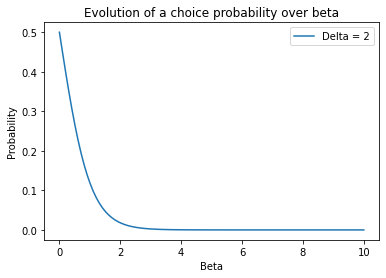

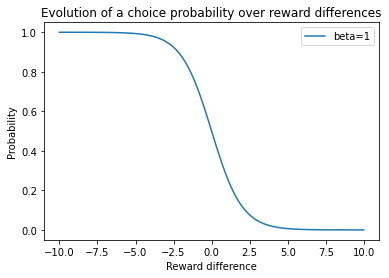

In [10]:
n=100

Beta=list(np.linspace(0,10,n))
d=2
p=[]

for beta in Beta:
    p.append(1/(1+np.exp(beta*d)))
    


plt.figure()
plt.xlabel('Beta')
plt.ylabel('Probability')
plt.title('Evolution of a choice probability over beta')
plt.plot(Beta,p,label=('Delta = ' + str(d)))
plt.legend(loc=0)
plt.show()




D=np.linspace(-10,10,n)
beta=1

p=[]
for d in D:
    p.append(1/(1+np.exp(beta*d)))

plt.figure()
plt.plot(D,p)
plt.xlabel('Reward difference')
plt.ylabel('Probability')
plt.title('Evolution of a choice probability over reward differences')
plt.legend(['beta='+str(beta)])
plt.show()




### Dumb bee

Is here consider that over the two days $m_y=5$ and $m_b=0$, we will study the case where $\beta=0$ and $\beta=0.8$.

COnsidering this elements we can calculate the probability the bee choose the blue flower: 
$p_{b}=\frac{1}{1+\exp \left(\beta\left(m_{y}-m_{b}\right)\right)}$


In [11]:
my=5
mb=0

d=my-mb

p=[]
beta=[0,0.8]
for b in beta:
    p.append(1/(1+np.exp(b*d)))


print('For the betas='+ str(beta)) 
print('the probability of choosing the blue flower equals ' + str(p))
    

    

For the betas=[0, 0.8]
the probability of choosing the blue flower equals [0.5, 0.01798620996209156]


Now can be computed the choice of the bee based on these calculated propability

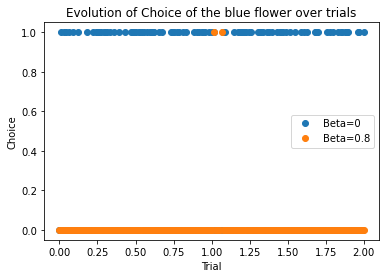

In [12]:
plt.figure()
N=np.linspace(0,2,2*n)

for b in beta:
    p=(1/(1+np.exp(b*d)))
    choices=[]
    for i in range(0,2*n):
        tirage=np.random.rand()
        if tirage>p:
            choices.append(0)
        elif tirage<=p:
            choices.append(1)

    plt.plot(N, choices,'o',label='Beta='+str(b))
    plt.xlabel('Trial')
    plt.ylabel('Choice')
    plt.title('Evolution of Choice of the blue flower over trials')
    plt.legend()
plt.show()

This is coherent with the fact that the blue flower is much less favored than the other one.

### Smart bee

Now let us assume that the bee is “smart” and that it can learn from its experiences. Each time it visits a blue flower, it will update the estimated reward according to the online update rule


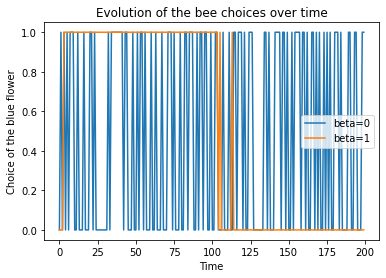

In [13]:
m_oy=5
m_ob=0

M_y=[m_oy]
M_b=[m_ob]
epsilon=0.2

Ry=[]
Rb=[]


for i in range (0,n):
    Ry.append(2)
    Rb.append(8)

for i in range (n,2*n):
    Ry.append(8)
    Rb.append(2)

epsilon=0.2
    
plt.figure()
beta=[0,1]
for b in beta:
    
    choices=[]
    for i in range (0,2*n):
        M_y.append(M_y[i]+ epsilon*(Ry[i]-M_y[i]))
        M_b.append(M_b[i]+ epsilon*(Rb[i]-M_b[i]))

        p=( 1/( 1+np.exp( b*(M_y[i]-M_b[i]) ) ) )

        tirage=np.random.rand()
        if tirage>p:
            choices.append(0)
        elif tirage<=p:
            choices.append(1)

    plt.plot(choices,label='beta='+str(b))
    plt.xlabel('Time')
    plt.ylabel('Choice of the blue flower')
    plt.title('Evolution of the bee choices over time')
    plt.legend()
plt.show()

As a result we can observe that for $\beta$ equals 1 that very shortly, the bee learns taht the blue flower is favored the first day and the yellow one the second day contrary to the situation where $\beta$ equals 0 and where there is no learning. In this second case the bee has no consistence in her choices and is very often mislead.



# PROBLEM 3 The drift diffusion model of decision-making.

In a two-alternative forced choice task (2AFC-task), subjects are asked to choose between two alternative
actions. We will here consider the case where a subject receives a visual motion stimulus (a
set of points on a screen that are moving in different directions) and then needs to indicate whether
the points were moving upwards or downwards. If such a motion stimulus is ambiguous or “noisy”,
the task can be quite difficult. We will assume that the motion stimulus continues until the subject
has made a choice. This scenario is well described by the “drift-diffusion-model”, in which the subject
compares the firing rate $m_A$ of an upward-motion sensitive neuron with the firing rate $m_B$ of a
downward-motion sensitive neuron and integrates the difference between the two,


## Implementation of the drift diffusion model solved thanks to the Euler method

We first plot some simulations of the drift derivation model on the following figure:

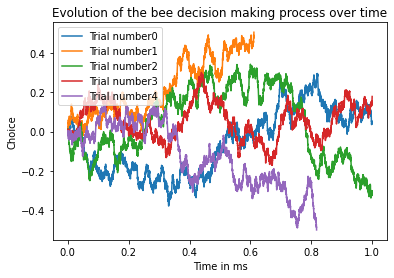

In [14]:
ma=1
mb=0.95
essai=5

t=1
iterations=10000
delta_t=t/iterations


sigma=0.5
x_o=0

mu=1/2



plt.figure()
for i in range (0,essai):
    X=[x_o]
    T=[0]

    eta=np.random.normal(0,1,iterations)
    for j in range (0,iterations):
        if X[-1]>= mu:
            break
        if X[-1]< -1*mu:
            break
        else:
            X.append(X[j]+(ma-mb)*delta_t+sigma*eta[j]*np.sqrt(delta_t))
            T.append(j*delta_t)
        


    plt.plot(T,X,label='Trial number'+str(i))
    plt.xlabel('Time in ms')
    plt.ylabel('Choice')
    plt.title('Evolution of the bee decision making process over time')
    plt.legend()
    
plt.show()    

We choose the value $\mu=0.5$ in order to have decisions made in the amount of time allowed. We can see that part of the simulation here converge either to choice $a$ or $b$. 

We now run the same simulation 1000 times and store the outcome (A vs. B) and the time of threshold crossing for each run.



623 choices have been made, over the 1000 trials.
377 decision making trials have not converged.


Text(0.5, 1.0, 'Repartition of choosing times')

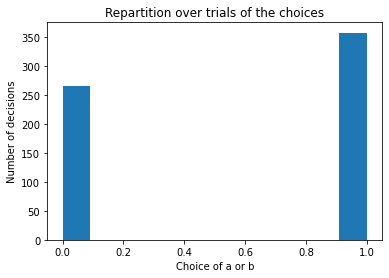

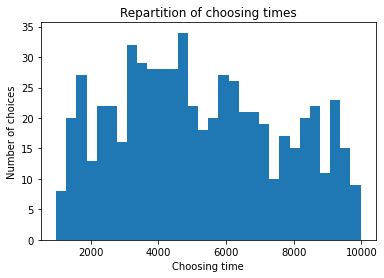

In [25]:
choix=[]
essai=1000
Iterations=[]
for i in range (0,essai):
    X=[x_o]
    T=[0]

    eta=np.random.normal(0,1,iterations)
    for j in range (0,iterations):
        if X[-1]>= mu:
            choix.append(1)
            Iterations.append(j)
            break
        if X[-1]< -1*mu:
            choix.append(0)
            Iterations.append(j)
            break
        else:
            X.append(X[j]+(ma-mb)*delta_t+sigma*eta[j]*np.sqrt(delta_t))
            T.append(j*delta_t)

converge=len(choix)
non_converge=essai-len(choix)

print(str(converge)+' choices have been made, over the 1000 trials.') 
print(str(non_converge) +' decision making trials have not converged.')

plt.figure()
plt.hist(x=choix,
         bins='auto')
plt.xlabel('Choice of a or b')
plt.ylabel('Number of decisions')
plt.title('Repartition over trials of the choices')


plt.figure()
plt.hist(x=Iterations,
         bins=30)
plt.xlabel('Choosing time')
plt.ylabel('Number of choices')
plt.title('Repartition of choosing times')


According to this plot we can conclude that this experimental simlation leads to a probability of choosing A and B equals to : 


In [16]:
pA=choix.count(1)/converge
pB=choix.count(0)/converge

print('Probability of choosing A: '+str(pA))
print('Probability of choosing B: '+str(pB))

Probability of choosing A: 0.5611390284757118
Probability of choosing B: 0.4388609715242881


### Comparison the the theoritical framework

Here is plotted the evolution of choice probability over the reward delta according to the *softmax* criteria.

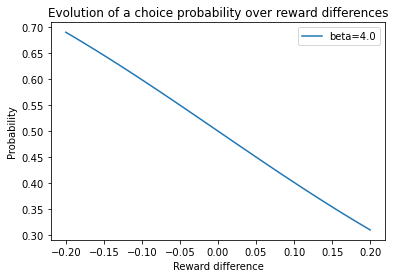

In [17]:
n=100

Beta=list(np.linspace(0,10,n))
d=2
p=[]


D=np.linspace(-.2,.2,n)
beta=2*mu/pow(sigma,2)

p=[]
for d in D:
    p.append(1/(1+np.exp(beta*d)))

plt.figure()
plt.plot(D,p)
plt.xlabel('Reward difference')
plt.ylabel('Probability')
plt.title('Evolution of a choice probability over reward differences')
plt.legend(['beta='+str(beta)])
plt.show()


In [18]:
me=ma-mb
print('In our previous case, Me=' +str(me))
print('Thus, the probability of choosing A equals')
p_meA=1/(1+np.exp(-beta*me))
print(p_meA)

In our previous case, Me=0.050000000000000044
Thus, the probability of choosing A equals
0.549833997312478


As a conclusion, we observe a small difference between the simlated probability of choosing A thanks to the drift derivation model and the softmax criteria. 
The softmax criteria is thus a good continuous modelisation of the discrete iterative process of DDM.

# PROBLEM 4 Advanced and optional exercise: Reinforcement learning in a maze.

## Modelisation of the rat strategy through the maze

We imagine a rat going through the maze shown below. The rat enters the maze at state A, then moves on
to either state B or C, then to D, E, F, or G, where it can potentially collect a reward (as given by the
numbers in the figure), and finally, the rat is taken out of the maze by the experimenter, and thereby
moves into the “terminal” state H (not shown).
We first assume the rat follows a random decision-making strategy (“policy”), i.e., at each junction, it moves left or right with 50% probability. How often does the rat visit each state s (where s = (A;B;C;D;E; F; G;H))

Theoreticaly, given the policy, for 100 trails, the rat should step 100 times in A and H 50 times in B and C and 25 times in D,E,F and G. To ckeck this we generate N = 100 trials of the rat’s behavior and count how often it visits each state. (Note: each trial consists of a succession of four states: s1; s2; s3; s4, the first state is always s1 = A and the last state is always the terminal state s4 = H. We assume that the rat never turns back and always moves forward.)

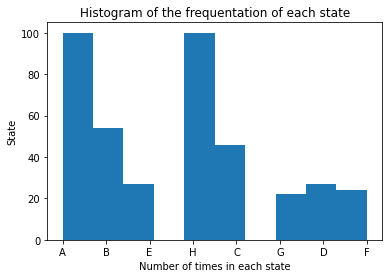

Probability of stepping at each step
  A     B     C     D     E     F     G    H
---  ----  ----  ----  ----  ----  ----  ---
  1  0.54  0.46  0.27  0.27  0.24  0.22    1


In [19]:
n=100

epsilon=.1
choices=[]
for i in range(0,n):
    choices.append(['A'])
    tirage1=np.random.rand()
    dernier=choices[-1]
    if tirage1>1/2:
        dernier.append('B')
        tirage2=np.random.rand()
        if tirage2>1/2:
            dernier.append('D')
        else:
            dernier.append('E')
    else:
        dernier.append('C')  
        tirage2=np.random.rand()
        if tirage2>1/2:
            dernier.append('F')
        else:
            dernier.append('G')
    dernier.append('H')


choices_flat= [item for sublist in choices for item in sublist]

plt.figure()
plt.hist(choices_flat, bins='auto')
plt.xlabel('Number of times in each state')
plt.ylabel('State')
plt.title('Histogram of the frequentation of each state')
plt.show()

from tabulate import tabulate

lettres=['A','B','C','D','E','F','G','H']
Prob=[]
for l in lettres:
    Prob.append(choices_flat.count(l)/n)
print('Probability of stepping at each step')    
print(tabulate([Prob],headers=lettres))
            



In reinforcement learning theory, each state has a value, which is the expected sum of all possible future rewards. These values can be learned through experience using a method called “temporal difference learning”. Initially, the rat assumes that no state carries any value (V (s) = 0 for all s).
After each trial, the state values are updated according to the temporal difference learning rule:

$V\left(s_{t}\right) \rightarrow V\left(s_{t}\right)+\epsilon\left[r\left(s_{t}\right)+V\left(s_{t+1}\right)-V\left(s_{t}\right)\right]$

where $s_t$ with t = (1; 2; 3; 4) denotes the sequence of states in a trial, and r(s) is the reward obtained in state s. We use the trial sequences generated in (a) to update the values V (s) and then plot the values V (s) as a function of the trial number.

<Figure size 432x288 with 0 Axes>

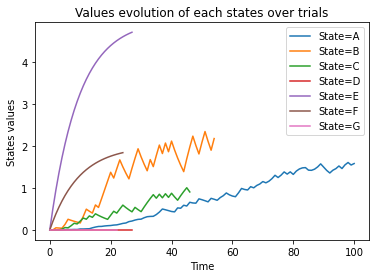

In [20]:
L=len(lettres)
V=[[0] for _ in range(L)]
R=[0,0,0,0,5,2,0,0]
gamma=1

plt.figure()
for i in range(0,n):
    actual_strat=choices[i]
    compteur=0

    for j in range(0,3):

        l=actual_strat[j]
        state_indice_lettres=lettres.index(l)
        state_1=actual_strat[compteur+1]
        state_indice_1=lettres.index(state_1)

        calcul= V[state_indice_lettres][-1] + epsilon*(R[state_indice_lettres]+gamma*V[state_indice_1][-1]-V[state_indice_lettres][-1])
        
        V[state_indice_lettres].append( calcul  )
        compteur+=1

    
plt.figure()
for i in range(0,L-1):

    plt.plot(V[i],label='State='+str(lettres[i]))
    plt.xlabel('Time')
    plt.ylabel('States values')
    plt.title('Values evolution of each states over trials')
    plt.legend()
plt.show()

A smart rat may want to use the information it is collecting about the values of the different states
(i.e., the expected future reward!) to adapt its decision-making strategy. We use the estimated values V (s)
from above to change the rat’s policy: assuming that at each junction, the rat compares the values of
the two choices using the “softmax”-decision rule used in bee-learning. 

We explore the two cases when the rat is “greedy” (low $\beta$), i.e., usually goes for the side with the larger value, and the case if the rat is very explorative?

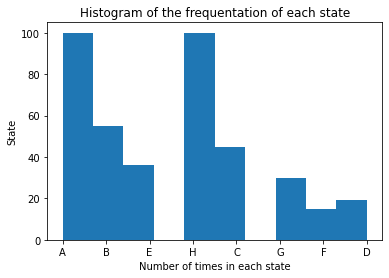

Probability of stepping at each step
  A     B     C     D     E     F    G    H
---  ----  ----  ----  ----  ----  ---  ---
  1  0.55  0.45  0.19  0.36  0.15  0.3    1


In [21]:
n=100

epsilon=0.1

b=0.1

L=len(lettres)
V=[[0] for _ in range(L)]
R=[0,0,0,0,5,2,0,0]
gamma=1


choices=[]
for i in range(0,n):
    choices.append(['A'])
    p1=( 1/( 1+np.exp( b*(V[1][-1]-V[2][-1]) ) ) )
    #print('p1= '+str(p1))
    dernier=choices[-1]
    tirage1=np.random.rand()
    if tirage1>p1:
        dernier.append('B')
        tirage2=np.random.rand()
        p2=( 1/( 1+np.exp( b*(V[3][-1]-V[4][-1]) ) ) )
        #print('p2= '+str(p2))
        if tirage2>p2:
            dernier.append('D')
        else:
            dernier.append('E')
    else:
        dernier.append('C')  
        tirage3=np.random.rand()
        p3=( 1/( 1+np.exp( b*(V[5][-1]-V[6][-1]) ) ) )
        #print('p3= '+str(p3))
        if tirage2>p3:
            dernier.append('F')
        else:
            dernier.append('G')
    dernier.append('H')

    
    compteur=0

    for j in range(0,3):

        l=dernier[j]
        state_indice_lettres=lettres.index(l)
        state_1=actual_strat[compteur+1]
        state_indice_1=lettres.index(state_1)
        
        #print('a ajouter')
        #print(V[state_indice_lettres][-1])
        calcul= V[state_indice_lettres][-1] + epsilon*(R[state_indice_lettres]+gamma*V[state_indice_1][-1]-V[state_indice_lettres][-1])
        #print('Indice ajout valeur '+str(state_indice_lettres))
        V[state_indice_lettres].append( calcul  ) 
        compteur+=1
    #print('V= '+str(V))
    #print(dernier)

#for i in range (0,7):
#    print(V[i][-1])
choices_flat= [item for sublist in choices for item in sublist]

plt.figure()
plt.hist(choices_flat, bins='auto')
plt.xlabel('Number of times in each state')
plt.ylabel('State')
plt.title('Histogram of the frequentation of each state')
plt.show()

from tabulate import tabulate

lettres=['A','B','C','D','E','F','G','H']
Prob=[]
for l in lettres:
    Prob.append(choices_flat.count(l)/n)
print('Probability of stepping at each step')    
print(tabulate([Prob],headers=lettres))


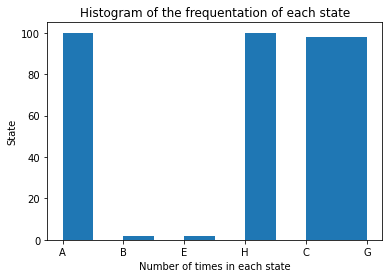

Probability of stepping at each step
  A     B     C    D     E    F     G    H
---  ----  ----  ---  ----  ---  ----  ---
  1  0.02  0.98    0  0.02    0  0.98    1


In [22]:
n=100

epsilon=0.1

b=10


L=len(lettres)
V=[[0] for _ in range(L)]
R=[0,0,0,0,5,2,0,0]
gamma=1


choices=[]
for i in range(0,n):
    choices.append(['A'])
    p1=( 1/( 1+np.exp( b*(V[1][-1]-V[2][-1]) ) ) )
    #print('p1= '+str(p1))
    dernier=choices[-1]
    tirage1=np.random.rand()
    if tirage1>p1:
        dernier.append('B')
        tirage2=np.random.rand()
        p2=( 1/( 1+np.exp( b*(V[3][-1]-V[4][-1]) ) ) )
        #print('p2= '+str(p2))
        if tirage2>p2:
            dernier.append('D')
        else:
            dernier.append('E')
    else:
        dernier.append('C')  
        tirage3=np.random.rand()
        p3=( 1/( 1+np.exp( b*(V[5][-1]-V[6][-1]) ) ) )
        #print('p3= '+str(p3))
        if tirage2>p3:
            dernier.append('F')
        else:
            dernier.append('G')
    dernier.append('H')


    compteur=0

    for j in range(0,3):

        l=dernier[j]
        state_indice_lettres=lettres.index(l)
        state_1=actual_strat[compteur+1]
        state_indice_1=lettres.index(state_1)

        #print('a ajouter')
        #print(V[state_indice_lettres][-1])
        calcul= V[state_indice_lettres][-1] + epsilon*(R[state_indice_lettres]+gamma*V[state_indice_1][-1]-V[state_indice_lettres][-1])
        #print('Indice ajout valeur '+str(state_indice_lettres))
        V[state_indice_lettres].append( calcul  ) 
        compteur+=1
    #print('V= '+str(V))
    #print(dernier)

#for i in range (0,7):
#    print(V[i][-1])
choices_flat= [item for sublist in choices for item in sublist]

plt.figure()
plt.hist(choices_flat, bins='auto')
plt.xlabel('Number of times in each state')
plt.ylabel('State')
plt.title('Histogram of the frequentation of each state')
plt.show()

from tabulate import tabulate

lettres=['A','B','C','D','E','F','G','H']
Prob=[]
for l in lettres:
    Prob.append(choices_flat.count(l)/n)
print('Probability of stepping at each step')    
print(tabulate([Prob],headers=lettres))

    

This results are coherent : the more greedy the rat is, the more consistently he will choose the most rewarded bow (C) thanks to the binary choices he can do. 